# Discovering interpretable features
In this chapter, you'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

# 1.Non-negative matrix factorization (NMF)
## 1.1 Non-negative data
Which of the following 2-dimensional arrays are examples of non-negative data?

1. A tf-idf word-frequency array.
2. An array daily stock market price movements (up and down), where each row represents a company.
3. An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has purchased a product.

###### Possible Answers:
1. 1 only
2. 2 and 3
3. 1 and 3

__Answer:__ Stock prices can go down as well as up, so an array of daily stock market price movements is not an example of non-negative data. (3)

## 1.2 NMF applied to Wikipedia articles
In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix `articles`. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

### Instructions:
* Import `NMF` from `sklearn.decomposition`.
* Create an `NMF` instance called `model` with `6` components.
* Fit the model to the word count data `articles`.
* Use the `.transform()` method of `model` to transform `articles`, and assign the result to `nmf_features`.
* Print `nmf_features` to get a first idea what it looks like.

In [1]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('_datasets/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

# fix seed (must get same results now and in later exercise)
import numpy as np
np.random.seed(1)

# from sklearn import decomposition
# import functools
# import inspect

# def _init_wrapper(f):
#     @functools.wraps(f)
#     def wrapper(*args, **kwargs):
#         bound_args = inspect.signature(f).bind(*args, **kwargs)
#         if not bound_args.arguments.get('n_components', None):
#             raise BaseException("Be sure to correctly specify n_components.")
#         else: 
#             return f(*args, **kwargs)
#     return wrapper
        
# if not getattr(decomposition.NMF.__init__, 'decorated', None):
#     decomposition.NMF.__init__ = _init_wrapper(decomposition.NMF.__init__)
#     decomposition.NMF.__init__.decorated = True

In [2]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
nmf_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.40465322e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.66604756e-01],
       [3.82058457e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.98646427e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.81739753e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.85517119e-01],
       [1.29290459e-02, 1.37889184e-02, 7.76313733e-03, 3.34487322e-02,
        0.00000000e+00, 3.34521818e-01],
       [0.00000000e+00, 0.00000000e+00, 2.06738655e-02, 0.00000000e+00,
        6.04486283e-03, 3.59061038e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.90976703e-01],
       [1.54274156e-02, 1.42817184e-02, 3.76628748e-03, 2.37111817e-02,
        2.62619893e-02, 

These NMF features don't make much sense at this point, but you will explore them in the next exercise!

## 1.2 NMF features of the Wikipedia articles
Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array `nmf_features` is available. Also available is a list titles giving the title of each Wikipedia `article`.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

### Instructions:
* Import `pandas` as `pd`.
* Create a DataFrame `df` from `nmf_features` using `pd.DataFrame()`. Set the index to `titles` using `index=titles`.
* Use the `.loc[]` accessor of `df` to select the row with title `'Anne Hathaway'`, and print the result. These are the NMF features for the article about the actress Anne Hathaway.
* Repeat the last step for `'Denzel Washington'` (another actor).

In [3]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
df.loc[['Anne Hathaway']]

,0,1,2,3,4,5
Anne Hathaway,0.003845,0.0,0.0,0.575711,0.0,0.0


In [4]:
# Print the row for 'Denzel Washington'
df.loc[['Denzel Washington']]

,0,1,2,3,4,5
Denzel Washington,0.0,0.005601,0.0,0.42238,0.0,0.0


Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

## 1.4 NMF reconstructs samples
In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values. On the right are the components of an NMF model. If the NMF feature values of a sample are `[2, 1]`, then which of the following is _most likely_ to represent the original sample? 
```
[[ 1.   0.5  0. ]
 [ 0.2  0.1  2.1]]
```
Possible Answers
1. `[2.2, 1.0, 2.0].`
2. `[0.5, 1.6, 3.1].`
3. `[-4.0, 1.0, -2.0].`

Solution:
```
 2 * | [[ 1.   0.5  0. ]
+1 * |  [ 0.2  0.1  2.1]]
------------------------
     | [  2.2  1.1  2.1 ]
```
Answer: (1)

# 2. NMF learns interpretable parts
## 2.1 NMF learns topics of documents
In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as `model`, while words is a list of the `words` that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

### Instructions:
* Import `pandas` as `pd`.
* Create a DataFrame `components_df` from `model.components_`, setting `columns=words` so that columns are labeled by the words.
* Print `components_df.shape` to check the dimensions of the DataFrame.
* Use the `.iloc[]` accessor on the DataFrame `components_df` to select row `3`. Assign the result to `component`.
* Call the `.nlargest()` method of `component`, and print the result. This gives the five words with the highest values for that component.

In [5]:
with open('_datasets/wikipedia-vocabulary-utf8.txt', 'r') as file:
    words = [line.strip() for line in file]

In [6]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
components_df.shape

(6, 13125)

In [7]:
# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
component.nlargest()

film       0.627877
award      0.253131
starred    0.245284
role       0.211451
actress    0.186398
Name: 3, dtype: float64

Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!

## 2.2 Explore the LED digits dataset
In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array `samples`, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

### Instructions:
* Import `matplotlib.pyplot` as `plt`.
* Select row `0` of `samples` and assign the result to `digit`. For example, to select column `2` of an array `a`, you could use `a[:,2]`. Remember that since `samples` is a NumPy array, you can't use the `.loc[]` or `iloc[]` accessors to select specific rows or columns.
* Print `digit`. Notice that it is a 1D array of 0s and 1s.
* Use the `.reshape()` method of `digit` to get a 2D array with shape `(13, 8)`. Assign the result to `bitmap`.
* Print `bitmap`, and notice that the 1s show the digit 7!
* Use the `plt.imshow()` function to display `bitmap` as an image.

In [8]:
df = pd.read_csv('_datasets/lcd-digits.csv', header=None)
samples = df.values

In [9]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0, :]

# Print digit
digit

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [10]:
# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
bitmap

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

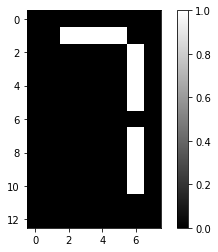

In [11]:
# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

You'll explore this dataset further in the next exercise and see for yourself how NMF can learn the parts of images.

## 2.3 NMF learns the parts of images
Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array `samples`. This time, you are also provided with a function `show_as_image()` that displays the image encoded by any 1D array:

In [12]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

### Instructions:
* Import `NMF` from `sklearn.decomposition`.
* Create an `NMF` instance called `model` with `7` components. (7 is the number of cells in an LED display).
* Apply the `.fit_transform()` method of `model` to `samples`. Assign the result to `features`.
* To each component of the model (accessed via `model.components_`), apply the `show_as_image()` function to that component inside the loop.
* Assign the row `0` of `features` to `digit_features`.
* Print `digit_features`.

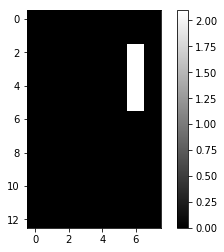

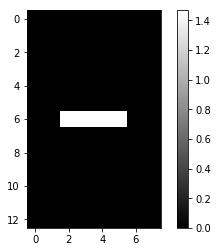

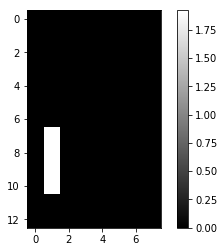

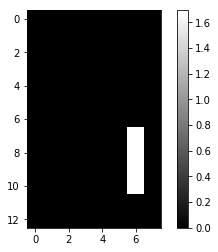

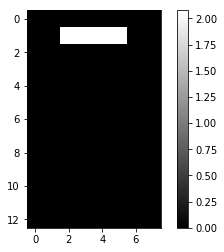

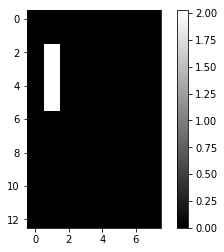

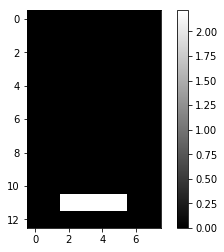

In [13]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [14]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
digit_features

array([4.76823559e-01, 0.00000000e+00, 0.00000000e+00, 5.90605054e-01,
       4.81559442e-01, 0.00000000e+00, 7.37529569e-16])

Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

## 2.4 PCA doesn't learn parts
Unlike NMF, PCA _doesn't_ learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array `samples`. Also available is a modified version of the `show_as_image()` function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

### Instructions:
* Import `PCA` from `sklearn.decomposition`.
* Create a `PCA` instance called `model` with `7` components.
* Apply the `.fit_transform()` method of `model` to `samples`. Assign the result to `features`.
* To each component of the model (accessed via `model.components_`), apply the `show_as_image()` function to that component inside the loop.

In [15]:
def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

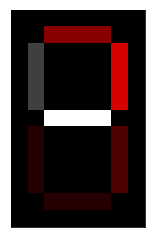

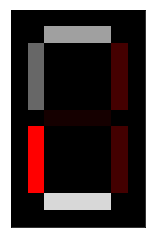

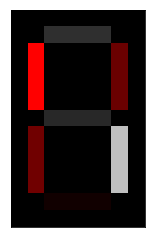

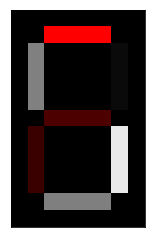

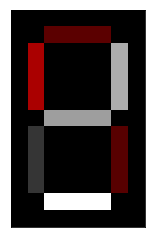

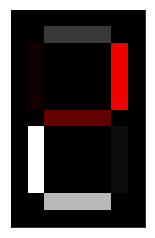

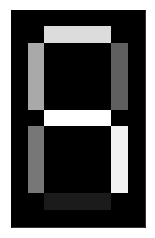

In [16]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

Notice that the components of PCA do not represent meaningful parts of images of LED digits!